# Исследование данных интернет магазина

**Описание проекта**

Доступны данные крупного интернет-магазина.

*Первая часть проекта* - приоритизация гипотез в целях максимизации ожидаемого улучшения ключевых метрик бизнеса 

*Цель:* Приоритизировать подготовленные совместно с маркетологами гипотезы по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.


*Вторая часть проекта* - анализ результатов A/B-теста

*Цель:* Оценить результаты А/В теста на основе изучения основных метрик:

- кумулятивной выручки
- кумулятивного среднего чека
- кумулятивного среднего количества заказов на посетителя.

Для выявления точек роста бизнеса, необходимо проанализировать и сравнить данные по пользователям из групп A и B, а также проверить следующие гипотезы:

- различий в среднем количестве заказов на пользователя между группами A и B нет
- различий в среднем чеке между группами A и B нет

Статистическая значимость различий будет рассчитана с помощью U-критерия Манна-Уитни.

По результатам оценки будет принято решение о прекращении, продолжении теста или признании большей эффективности одной из групп.

**Описание данных**

Данные для первой части

Файл `/datasets/hypothesis.csv` содержит 9 гипотез по увеличению выручки:

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл `/datasets/orders.csv` содержит результат A/B-теста по заказам

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv` содержит результат A/B-теста по посещениям

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез

### Шаг 1. Загрузим данные и подготовим их к анализу

#### 1.1 Импортируем необходимые библиотеки и считаем CSV-файлы с данными, сохраним их в датафреймы

In [1]:
#импортируем все необходимые библиотеки
import pandas as pd
import datetime as dt
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### 1.2 Ознакомимся с набором данных. Изучим общую информацию датафрейме

In [3]:
#выведем все строки датафрейма, т.к. гипотез всего 9
pd.set_option('display.width', 500)
data_h

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Данные по всем параметрам приведены в 10-балльной системе оценки, как указано в описании данных. Самые затратные гипотезы: 2 (запуск собственной службы доставки) и 4 (изменение структуры категорий).

In [4]:
#приведем названия колонок к нижнему регистру
data_h.columns = data_h.columns.str.lower()
data_h.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [5]:
#убедимся, что в датафрейме подходящие для расчетов типы данных
data_h.dtypes

hypothesis    object
reach          int64
impact         int64
confidence     int64
efforts        int64
dtype: object

### Шаг 2. Приоритизируем гипотезы

#### 2.1 Применим фреймворк ICE для приоритизации гипотез

In [6]:
data_h['ICE'] = (data_h['impact'] * data_h['confidence'] / data_h['efforts']).round(2)

In [7]:
pd.set_option('max_colwidth', 130)
data_h[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False) #отсортируем гипотезы по убыванию приоритета

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наибольшее количество баллов по методу ICE получили гипотезы:
- 9 (скидка на товар в день рождения), 
- 1 (+2 новых канала привлечения), 
- 8 (добавление формы подписки на основные страницы).

Также можно выделить гипотезы:
- 7 (баннеры с акциями на главной странице),
- 3 (блоки с рекомендациями товаров на сайте)

#### 2.2 Применим фреймворк RICE для приоритизации гипотез

In [8]:
data_h['RICE'] = data_h['reach'] * data_h['impact'] * data_h['confidence'] / data_h['efforts']

In [9]:
pd.set_option('max_colwidth', 130)
data_h[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False) #отсортируем гипотезы по убыванию приоритета

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наибольшее количество баллов по фреймворку RICE получили те же гипотезы, но теперь отрыв по баллам между ними гораздо больше:
- 8 (добавление формы подписки на основные страницы),
- 3 (блоки с рекомендациями товаров на сайте),
- 1 (+2 новых канала привлечения), 
- 7 (баннеры с акциями на главной странице)
- 9 (скидка на товар в день рождения).

### Вывод

С добавлением параметра Reach в метод ICE:
- Лидировавшая ранее гипотеза 9 (скидка на товар в день рождения) занимает 5 место по важности, а ее вес в 2.5 раза уступает весу гипотез 1 и 7.
- Гипотеза 3 (блоки с рекомендациями товаров на сайте) становится второй по перспективности, хотя во фреймворке ICE занимала 5 место.
- Добавление новых каналов привлечения трафика и показ баннеров с акциями на главной странице имеют одинаковый вес (гипотезы 1 и 7).
- Гипотеза 8 (добавление формы подписки на основные страницы) становится самой перспективной гипотезой, ее оценка в 2 раза превышает оценку следующей по значимости гипотезы (3).

Приоритизация гипотез при применении RICE вместо ICE так изменилась, поскольку мы начали учитывать охват пользователей, которых затронут предполагаемые изменения. Скидка на товар в день рождения хорошо влияет на пользователей и маркетологи уверены в ее эффективности, но у этого действия минимальные охваты, вероятно, из-за того, что не все пользователи охотно делятся личной информацией. Форму подписки на всех основных страницах, напротив, увидит максимальное количество посетителей сайта, при этом эксперты так же уверены в эффективности нововведения, поэтому гипотеза 8 становится наиболее перспективной.

## Часть 2. Анализ A/B-теста

### Шаг 1. Загрузим данные и подготовим их к анализу

#### 1.1 Считаем CSV-файлы с данными, сохраним их в датафреймы

In [10]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

#### 1.2 Выведем первые строки наборов данных. Изучим общую информацию датафреймах

In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
#приведем названия столбцов к "змеиному" регистру
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

#проверим обновленные названия столбцов
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [14]:
#приведем столбец date к типу datetime
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders.dtypes

transaction_id             int64
visitor_id                 int64
date              datetime64[ns]
revenue                    int64
group                     object
dtype: object

In [15]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
#приведем столбец date к типу datetime
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

In [18]:
#проверим данные на наличие явных дубликатов
print(orders.duplicated().sum(), visitors.duplicated().sum())

0 0


In [19]:
#проверим данные на наличие явных дубликатов
print(orders['group'].sort_values().unique())
print(visitors['group'].sort_values().unique())

['A' 'B']
['A' 'B']


#### 1.3 Соберем кумулятивные данные для анализа

In [20]:
#создадим массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

In [21]:
#аггрегируем значения по заказам
orders_aggregated = dates_groups.apply(lambda x: 
                                      orders[np.logical_and(orders['date'] <= x['date'], 
                                                            orders['group'] == x['group'])]
                                       .agg({'date' : 'max', 
                                             'group' : 'max', 
                                             'transaction_id' : 'nunique', 
                                             'visitor_id' : 'nunique', 
                                             'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
orders_aggregated.head(10)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996
499,2019-08-04,A,84,77,425699
498,2019-08-04,B,78,75,489567
698,2019-08-05,A,109,100,549917
699,2019-08-05,B,101,98,581995


In [22]:
#аггрегируем значения по посещениям
visitors_aggregated = dates_groups.apply(lambda x: 
                                         visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                 visitors['group'] == x['group'])]
                                         .agg({'date' : 'max', 
                                               'group' : 'max', 
                                               'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitors_aggregated.head(6)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803


In [23]:
#объединим кумулятивные данные в одной таблице
cumulative_data = orders_aggregated.merge(visitors_aggregated, 
                                          left_on=['date', 'group'], 
                                          right_on=['date', 'group'])

cumulative_data.head()

,date,group,transaction_id,visitor_id,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [24]:
#присвоим столбцам таблицы новые названия
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [25]:
#создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

In [26]:
#cоздадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

### Шаг 2. Проведем анализ результатов A/B-теста

#### 2.1 Построим график кумулятивной выручки по группам

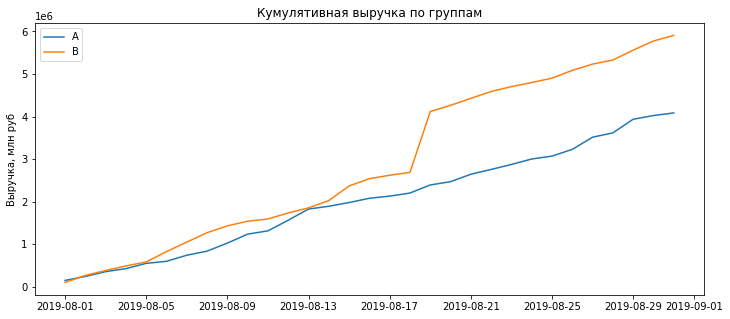

In [27]:
plt.figure(figsize=(12, 5))

#график выручки группы А
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')

#график выручки группы B
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.ylabel('Выручка, млн руб')
plt.legend() 

Выручка по группе A равномерно увеличивается в течение всего теста, возможно, есть более крупные заказы 13 августа. График выручки по группе B близок по значениям к группе A до определенного момента. С 19 августа выручка по группе B начинает почти в 2 раза превышать выручку по группе A, с этого же момента графики становятся более равномерными.

#### 2.2 Построим график кумулятивного среднего чека по группам

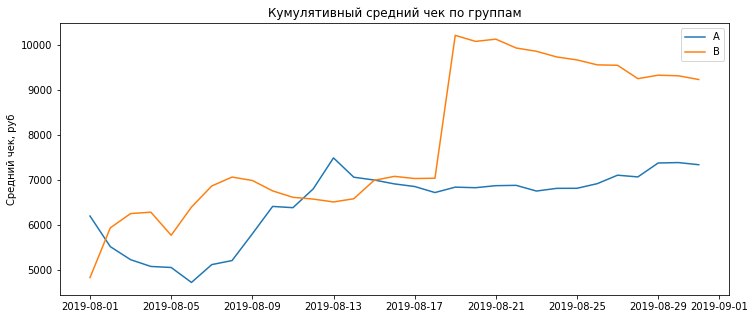

In [28]:
plt.figure(figsize=(12, 5))

#график среднего чека группы А
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')

#график среднего чека группы B
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Средний чек, руб')
plt.legend() 

Можно заметить, что в первой половине теста в группу B попадали более крупные заказы, т.к. средний чек по группе A низкий, в то время, как по группе B высокий. Ситуация меняется 13 августа: видим высокий чек по группе A и низкий по группе B, после чего для группы А средний чек начинает  устанавливаться в районе 7 000, для группы B - в районе 10 000, но постепенно падает до 9 500. Средний чек по обеим группам становится более равномерным с 19 августа, так же, как и выручка.

#### 2.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A

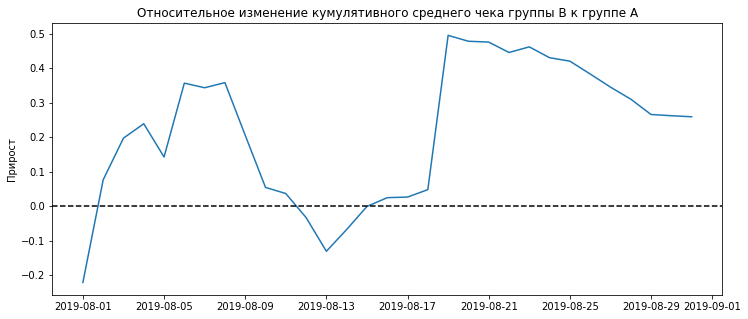

In [29]:
#соберем данные по группам в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, 
                                                       left_on='date', 
                                                       right_on='date', 
                                                       how='left', 
                                                       suffixes=['A', 'B'])

#поcтроим график относительного изменения средних чеков
plt.figure(figsize=(12, 5))

plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel('Прирост')

#добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

Чеки группы B в среднем на 30% выше чеков группы A, однако ближе к середине теста график резко падает. Возможно, это сигнал об аномально высоких чеках.

#### 2.4 Построим график кумулятивного среднего количества заказов на посетителя по группам

(18109.0, 18139.0, 0.0, 0.04)

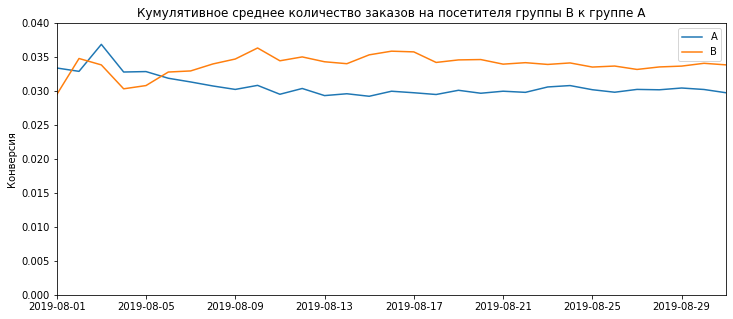

In [30]:
#посчитаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

#данные по группе A
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']

#данные по группе B
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

#построим графики
plt.figure(figsize=(12, 5))

plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.title('Кумулятивное среднее количество заказов на посетителя группы B к группе A')
plt.ylabel('Конверсия')
plt.legend()

#зададим масштаб осей
plt.axis([cumulative_data['date'].min(), cumulative_data['date'].max(), 0, 0.040]) 

Графики по обеим группам колеблются до 19 августа, после конверсия по группе A устанавливается на уровне 3%, для группы B - на уровне 3.5%.

#### 2.5 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

(18109.0, 18139.0, -0.4, 0.4)

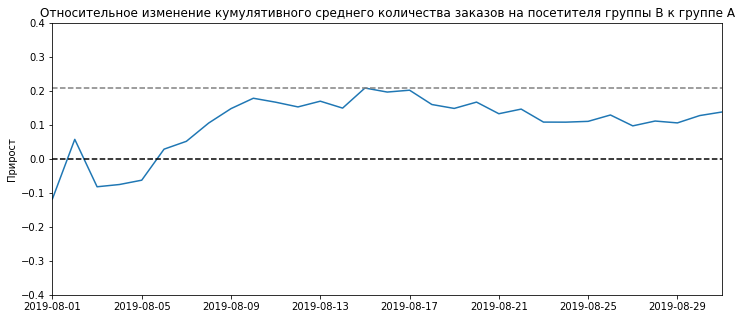

In [31]:
merged_сumulative_сonversions = cumulative_data_A[['date','conversion']].merge(
    cumulative_data_B[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B'])

#построим графики
plt.figure(figsize=(12, 5))

plt.plot(merged_сumulative_сonversions['date'], 
         merged_сumulative_сonversions['conversionB']/merged_сumulative_сonversions['conversionA']-1)
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Прирост')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.axis([merged_сumulative_сonversions['date'].min(), 
          merged_сumulative_сonversions['date'].max(), 
          -0.4, 0.4])

Среднее количество заказов группы B относительно группы A имеет резкие колебания в первые дни теста, но практически с самого начала в группе B заказов больше. В середине теста с 11 по 22 августа количество заказов в группе B на 15-20% превышает количество заказов в группе A, после видим небольшой спад и график устанавливается в райноне 11%.

#### 2.6 Построим точечный график количества заказов по пользователям
Сделаем выводы и предположения.

In [32]:
orders_by_users = (orders.groupby('visitor_id', as_index=False)
                   .agg({'transaction_id': 'nunique'}))
orders_by_users.columns = ['visitor_id', 'orders']

orders_by_users.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Text(0, 0.5, 'Количество заказов')

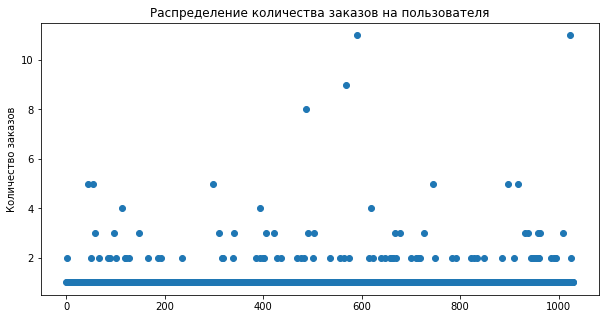

In [33]:
#сформируем серию из чисел от 0 до количества наблюдений в orders_by_users
x_values = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Распределение количества заказов на пользователя')
plt.ylabel('Количество заказов')

Большая часть пользователей делала всего один заказ. Более двух заказов совершалось очень редко. Также можно заметить явные выбросы - больше 4 заказов. Следует определить границы для более точного выявления аномальных пользователей.

#### 2.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [34]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершали больше 2 заказов, не более 1% пользователей - больше 4 заказов. Пользователей, оформивших более 4 заказов, можно считать аномальными.

#### 2.8 Построим точечный график стоимостей заказов

In [35]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


Text(0, 0.5, 'Выручка, млн руб.')

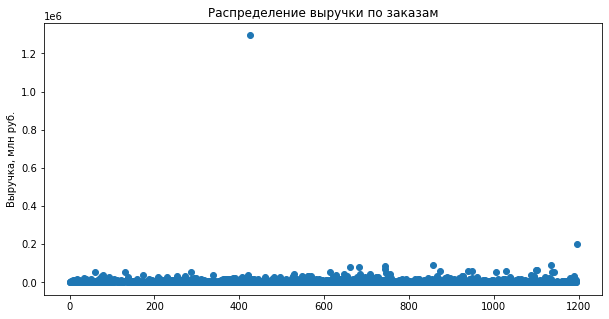

In [36]:
#сформируем серию из чисел от 0 до количества наблюдений в orders
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение выручки по заказам')
plt.ylabel('Выручка, млн руб.')

Сумма большей части заказов менее 50 тыс руб, также видим выбросы в районе 200 тыс руб и более 1,3 млн руб.

#### 2.9 Посчитаем 95-й и 99-й перцентили стоимости заказов

In [37]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Заказы, стоимостью выше 28 000 руб. составляют не более 5%. Не более, чем 1% заказов имеет средний чек выше 58 233 руб. Примем заказы дороже 30 000 руб за аномальные.

#### 2.10 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [38]:
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']

visitors_A_cummulative = visitors_A_daily.apply(lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']]
                                                .agg({'date': 'max', 
                                                      'visitors_per_date_A': 'sum'}), 
                                                axis=1)
visitors_A_cummulative.columns = ['date', 'visitors_cummulative_A']

In [39]:
visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']

visitors_B_cummulative = visitors_B_daily.apply(lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']]
                                                .agg({'date': 'max', 
                                                      'visitors_per_date_B': 'sum'}), 
                                                axis=1)
visitors_B_cummulative.columns = ['date', 'visitors_cummulative_B']

In [40]:
orders_A_daily = (orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
                  .groupby('date', as_index=False)
                  .agg({'transaction_id': pd.Series.nunique, 
                        'revenue': 'sum'}))
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

orders_A_cummulative = orders_A_daily.apply(lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']]
                                            .agg({'date': 'max', 
                                                  'orders_per_date_A': 'sum', 
                                                  'revenue_per_date_A': 'sum'}),axis=1).sort_values(by=['date'])
orders_A_cummulative.columns = ['date', 'orders_cummulative_A', 'revenue_cummulative_A']

In [41]:
orders_B_daily = (orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
                  .groupby('date', as_index=False)
                  .agg({'transaction_id': pd.Series.nunique, 
                        'revenue': 'sum'}))
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

orders_B_cummulative = orders_B_daily.apply(lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']]
                                            .agg({'date': 'max', 
                                                  'orders_per_date_B': 'sum', 
                                                  'revenue_per_date_B': 'sum'}),axis=1).sort_values(by=['date'])
orders_B_cummulative.columns = ['date', 'orders_cummulative_B', 'revenue_cummulative_B']

In [42]:
data = (orders_A_daily
        .merge(orders_B_daily, left_on='date', right_on='date', how='left')
        .merge(orders_A_cummulative, left_on='date', right_on='date', how='left')
        .merge(orders_B_cummulative, left_on='date', right_on='date', how='left')
        .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
        .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
        .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
        .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [43]:
#число заказов для пользователей группы A, совершивших хотя бы 1 заказ
orders_by_users_A = (orders[orders['group'] == 'A']
                     .groupby('visitor_id', as_index=False)
                     .agg({'transaction_id': pd.Series.nunique}))
orders_by_users_A.columns = ['visitor_id', 'orders']

In [44]:
#число заказов для пользователей группы B, совершивших хотя бы 1 заказ
orders_by_users_B = (orders[orders['group'] == 'B']
                     .groupby('visitor_id', as_index=False)
                     .agg({'transaction_id': pd.Series.nunique}))
orders_by_users_B.columns = ['visitor_id', 'orders']

In [45]:
#для пользователей с заказами - число заказов, для пользователей без заказов - 0
sample_A = pd.concat([orders_by_users_A['orders'], 
                      pd.Series(0, 
                                index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])),
                                name='orders')], 
                     axis=0)

In [46]:
sample_B = pd.concat([orders_by_users_B['orders'], 
                      pd.Series(0, 
                                index=np.arange(data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])),
                                name='orders')], 
                     axis=0)

Сформулируем нулевую и альтернативные гипотезы:

$H_{0}$: различий в среднем количестве заказов на пользователя между группами A и B нет

$H_{1}$: в среднем количестве заказов на пользователя между группами A и B есть различия

In [47]:
print('p_value:', "{0:.3f}".format(st.mannwhitneyu(sample_A, sample_B)[1]))

print('Прирост среднего количества заказов группы B к группе A:', "{0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))

p_value: 0.017
Прирост среднего количества заказов группы B к группе A: 0.138


Отвергаем нулевую гипотезу, т.к. p-value < 0.05, а относительное различие между средним количеством заказов группы B к группе A составляет почти 14%. 

Стоит отметить, что при уровне значимости 1% нулевая гипотеза бы не отвергалась.

#### 2.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем нулевую и альтернативные гипотезы:

$H_{0}$: различий в среднем чеке между группами A и B нет

$H_{1}$: в среднем чеке между группами A и B есть различия

In [48]:
print('p_value:', '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                                   orders[orders['group']=='B']['revenue'])[1]))

print('Прирост среднего чека группы B к группе A:', 
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1))

p_value: 0.729
Прирост среднего чека группы B к группе A: 0.259


P-value > 0.05, значит статистически значимых отличий между средними чеками групп A и B нет. Однако относительное различие в средних чеков составляет почти 26%, поэтому стоит провести дополнительный тест на данных с исключением аномалий.

#### 2.12 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Исключим пользователей совершивших более 4-х покупок (1% пользователей с наибольшим числом заказов), а также тех, кто совершил заказы дороже 30 000 рублей (от 1% до 5% пользователей с самыми дорогими заказами).

In [49]:
users_with_many_orders = pd.concat([orders_by_users_A[orders_by_users_A['orders'] > 4]['visitor_id'],
                                    orders_by_users_B[orders_by_users_B['orders'] > 4]['visitor_id']],
                                   axis=0)

users_with_expensive_orders = orders[orders['revenue'] > 40000]['visitor_id']
abnormal_users = (pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
                  .drop_duplicates()
                  .sort_values())

print(abnormal_users.head())
print(abnormal_users.shape[0])

1099    148427295
684     358944393
648     382846391
1137    759473111
339     834731816
Name: visitor_id, dtype: int64
29


Пользователей с аномальными заказами - 29. Исключим их из выборки для проведения тестов.

In [50]:
sample_A_filtered = pd.concat([orders_by_users_A
                               [np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))]['orders'],
                               pd.Series(0,
                                         index=np.arange(
                                             data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])),
                                         name='orders')],
                              axis=0)

In [51]:
sample_B_filtered = pd.concat([orders_by_users_B
                               [np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))]['orders'],
                               pd.Series(0,
                                         index=np.arange(
                                             data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])),
                                         name='orders')],
                              axis=0)

In [52]:
print('p_value:', '{0:.3f}'.format(st.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))

print('Прирост среднего количества заказов группы B к группе A:', 
      '{0:.3f}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1))

p_value: 0.010
Прирост среднего количества заказов группы B к группе A: 0.166


После очистки данных от аномальных пользователей p-value также меньше 0.05, относительное различие между средним количеством заказов 16.6%. Нулевую гипотезу об отсутствии различий в среднем количестве заказов на пользователя между группами A и B отвергаем. Пользователи из группы B совершают значительно больше заказов в интернет-магазине, чем пользователи из группы A.

#### 2.13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [53]:
print('{0:.3f}'.format(st.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A',
                          np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B',
                          np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]))

print("{0:.3f}".format(orders[
    np.logical_and(orders['group'] == 'B',
                   np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()/ 
                       orders[
                           np.logical_and(
                               orders['group'] == 'A',
                               np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()
                       - 1))

0.612
0.069


P-value уменьшился, но он все так же больше 0.05, значит статистически значимых отличий между средними чеками групп даже после удаления аномалий A и B нет. К тому же, относительное различие в средних чеков с 26%, снизилось до 7%. Нет оснований отвергать нулевую гипотезу о равенстве средних чеков между двумя группами.

#### Вывод:

- По среднему чеку между группами нет статистически значимого различия и по сырым, и по очищенным данным. 

- С определенного момента выручка по группе B начинает почти в 2 раза превышать выручку по группе A, с этого же момента графики становятся более равномерными.

- Есть статистически значимое различие по среднему количеству заказа между группами как по сырым данным, так и после исключения аномалий. Относительное различие по конверсии составляет почти 17%.

- График различия конверсии между группами показывает, что результаты группы B лучше группы A: до середины теста они имеют тенденцию к росту, после немного снижаются и устанавливаются возле одного значения.

Поскольку достигнуто статистически значимое различие между группами по конверсии даже после очистки данных от аномальных значений, выручка группы B за последние 2 недели теста выше выручки группы A в 2 раза, а график относительного различия конверсии свидетельствует, что результаты группы B стабильно лучше результатов группы A, принято решение остановить тест и зафиксировать эффективность изменений, тестируемых на группе B.
